In [34]:
print("Shishank")

Shishank


In [64]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [93]:
#load dataset
df = pd.read_csv('../data/raw/loan_data.csv')
df.head()


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,Graduate,No,16402,10888,597,180,1.0,Urban,1
1,Female,No,Not Graduate,No,22371,12540,666,240,1.0,Semiurban,1
2,Male,Yes,Graduate,Yes,17038,2097,435,360,1.0,Rural,1
3,Male,No,Graduate,No,5572,7318,174,360,0.0,Urban,0
4,Female,No,Not Graduate,No,17068,4663,689,120,1.0,Semiurban,1


2️⃣ Data Overview

In [94]:
df.shape

(158, 11)

In [95]:
df.columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [96]:
df['Education'].value_counts()

Education
Graduate        126
Not Graduate     32
Name: count, dtype: int64

In [97]:
df['Property_Area'].value_counts()

Property_Area
Urban        60
Semiurban    54
Rural        44
Name: count, dtype: int64

In [98]:
df['Loan_Status'].value_counts()

Loan_Status
1    100
0     58
Name: count, dtype: int64

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             158 non-null    object 
 1   Married            158 non-null    object 
 2   Education          158 non-null    object 
 3   Self_Employed      158 non-null    object 
 4   ApplicantIncome    158 non-null    int64  
 5   CoapplicantIncome  158 non-null    int64  
 6   LoanAmount         158 non-null    int64  
 7   Loan_Amount_Term   158 non-null    int64  
 8   Credit_History     158 non-null    float64
 9   Property_Area      158 non-null    object 
 10  Loan_Status        158 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 13.7+ KB


In [100]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,14190.974684,4211.708861,349.088608,282.151899,0.632911,0.632911
std,5225.775422,2497.018503,156.153623,87.646814,0.483544,0.483544
min,5572.000000,0.000000,120.000000,120.000000,0.000000,0.000000
25%,9025.000000,2225.000000,200.000000,240.000000,0.000000,0.000000
50%,14150.000000,3200.000000,310.000000,360.000000,1.000000,1.000000
75%,19200.000000,5950.000000,497.500000,360.000000,1.000000,1.000000
max,24700.000000,14300.000000,700.000000,360.000000,1.000000,1.000000


In [101]:
df.nunique()

Gender                2
Married               2
Education             2
Self_Employed         2
ApplicantIncome      85
CoapplicantIncome    59
LoanAmount           45
Loan_Amount_Term      5
Credit_History        2
Property_Area         3
Loan_Status           2
dtype: int64

3️⃣ Missing Value Analysis

In [102]:
df.isnull().sum()

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Graphically dekhne ke liye:

In [103]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,Graduate,No,16402,10888,597,180,1.0,Urban,1
1,Female,No,Not Graduate,No,22371,12540,666,240,1.0,Semiurban,1
2,Male,Yes,Graduate,Yes,17038,2097,435,360,1.0,Rural,1
3,Male,No,Graduate,No,5572,7318,174,360,0.0,Urban,0
4,Female,No,Not Graduate,No,17068,4663,689,120,1.0,Semiurban,1


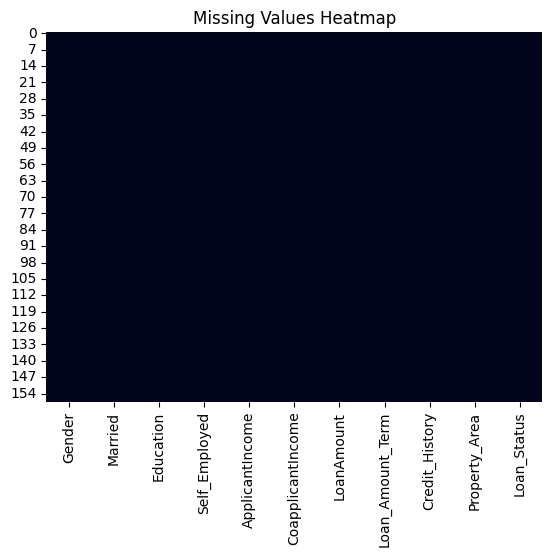

In [104]:
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

Handle missing data:

Column	Strategy
Gender, Married, Self_Employed	Mode se fill karo
LoanAmount, Loan_Amount_Term	Median se fill karo
Credit_History	Mode se fill karo

Example:

df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df.dropna(subset=['Credit_History'], inplace=True)

4️⃣ Data Visualization (EDA Visuals)

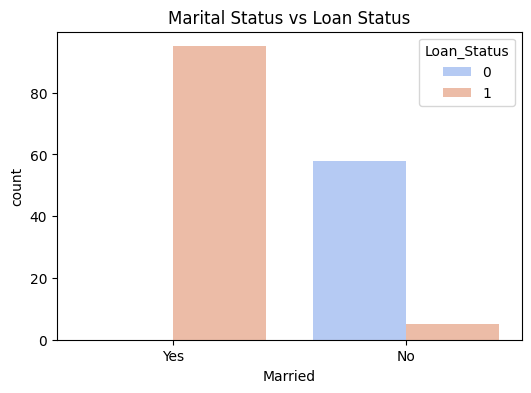

In [105]:
# Married vs Loan Status
plt.figure(figsize=(6,4))
sns.countplot(x='Married', hue='Loan_Status', data=df, palette='coolwarm')
plt.title("Marital Status vs Loan Status")
plt.show()

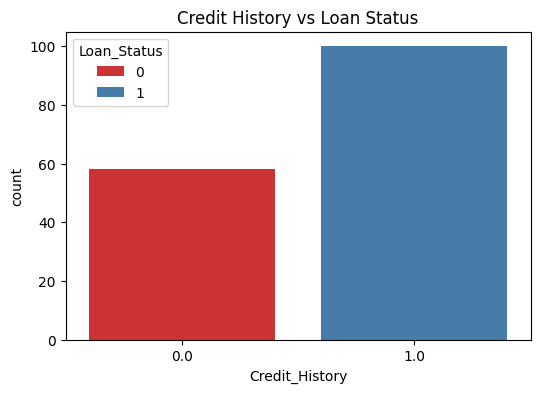

In [106]:
# Credit History vs Loan Status
plt.figure(figsize=(6,4))
sns.countplot(x='Credit_History', hue='Loan_Status', data=df, palette='Set1')
plt.title("Credit History vs Loan Status")
plt.show()

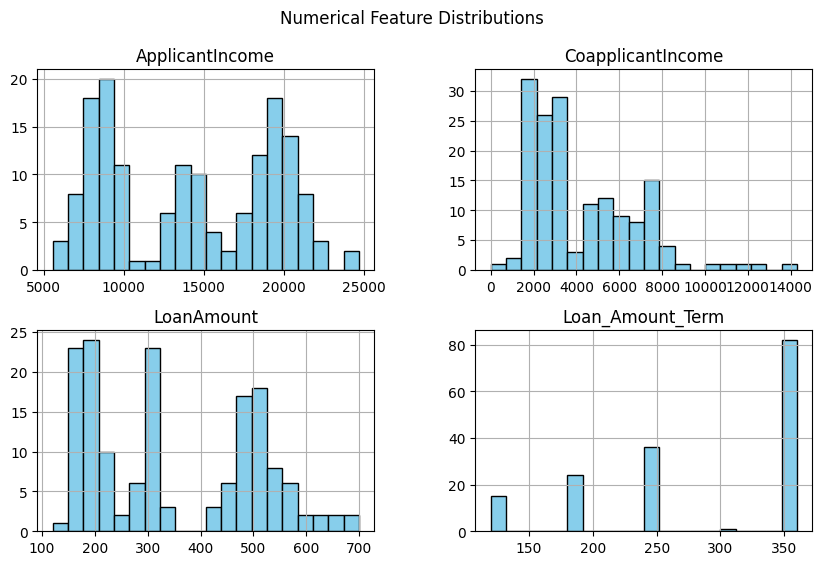

In [107]:
# Distribution of numerical features
num_cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
df[num_cols].hist(figsize=(10,6), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Numerical Feature Distributions")
plt.show()

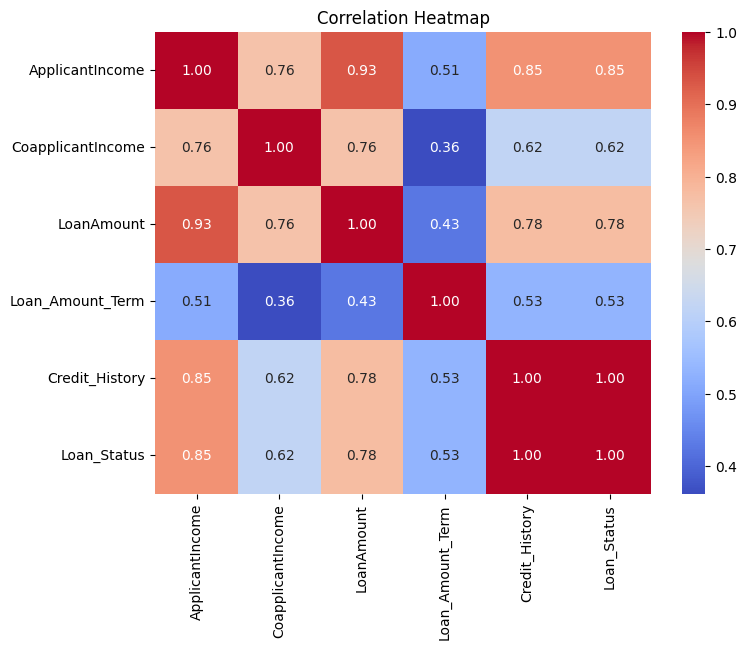

In [108]:

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

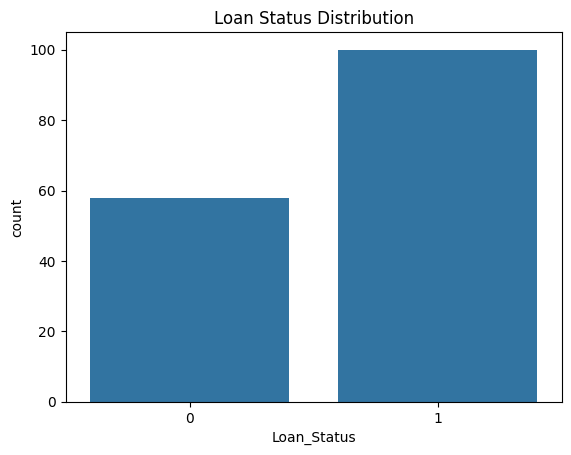

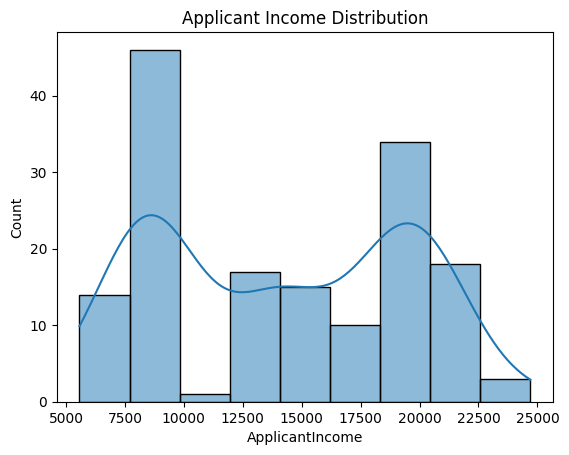

In [109]:
# 🔸 Univariate Analysis

# Ek column par:

sns.countplot(x='Loan_Status', data=df)
plt.title('Loan Status Distribution')
plt.show()

sns.histplot(df['ApplicantIncome'], kde=True)
plt.title('Applicant Income Distribution')
plt.show()


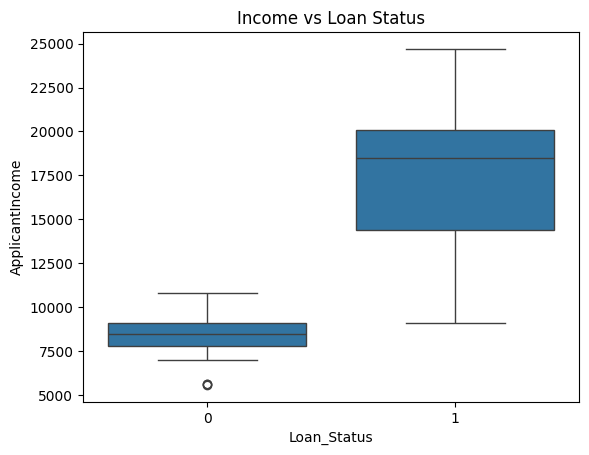

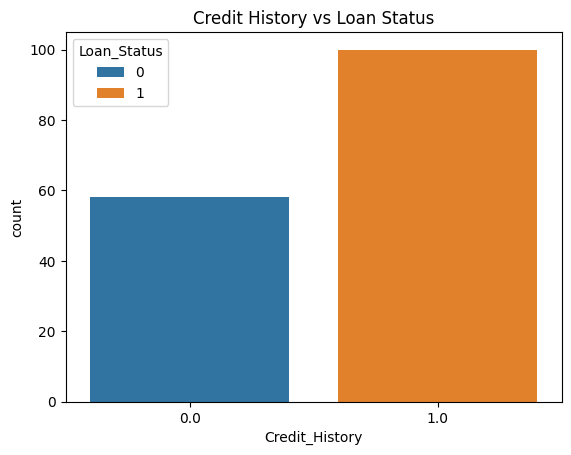

In [110]:
#Bivariate Analysis (Target ke sath)
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)
plt.title('Income vs Loan Status')
plt.show()

sns.countplot(x='Credit_History', hue='Loan_Status', data=df)
plt.title('Credit History vs Loan Status')
plt.show()


5️⃣ Outlier Detection

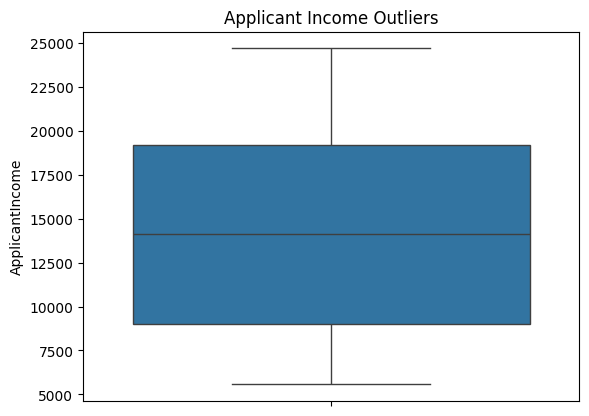

In [111]:
#Boxplot check karo:
sns.boxplot(df['ApplicantIncome'])
plt.title('Applicant Income Outliers')
plt.show()


🪜 Step-by-Step Next After EDA
🧩 STEP 1: Data Cleaning & Encoding

Before training, hume ensure karna hai ki saare features numeric form me ho (ML models ko numbers chahiye).

In [112]:
df['Loan_Status']

0      1
1      1
2      1
3      0
4      1
      ..
153    1
154    0
155    1
156    0
157    1
Name: Loan_Status, Length: 158, dtype: int64

In [113]:
# Handle categorical columns (convert to numeric)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cat_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

for col in cat_cols:
    df[col] = le.fit_transform(df[col])



In [116]:
df[['Gender','Married']]

,Gender,Married
0,1,1
1,0,0
2,1,1
3,1,0
4,0,0
...,...,...
153,0,1
154,1,0
155,1,1
156,0,0


In [115]:
df['Loan_Status']

0      1
1      1
2      1
3      0
4      1
      ..
153    1
154    0
155    1
156    0
157    1
Name: Loan_Status, Length: 158, dtype: int64

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             158 non-null    int64  
 1   Married            158 non-null    int64  
 2   Education          158 non-null    int64  
 3   Self_Employed      158 non-null    int64  
 4   ApplicantIncome    158 non-null    int64  
 5   CoapplicantIncome  158 non-null    int64  
 6   LoanAmount         158 non-null    int64  
 7   Loan_Amount_Term   158 non-null    int64  
 8   Credit_History     158 non-null    float64
 9   Property_Area      158 non-null    int64  
 10  Loan_Status        0 non-null      float64
dtypes: float64(2), int64(9)
memory usage: 13.7 KB


⚙️ STEP 2: Split Dataset (Train/Test)

Now hum apna data train aur test me divide karenge.

In [117]:
from sklearn.model_selection import train_test_split

X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (126, 10)
Test set shape: (32, 10)


🌲 STEP 3: Train Model (Random Forest)

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


📊 STEP 4: Evaluate Model

Ab accuracy aur confusion matrix dekh lo.

In [119]:
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n🔹 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 1.0

🔹 Confusion Matrix:
 [[ 9  0]
 [ 0 23]]

🔹 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        23

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



📈 STEP 5: Feature Importance (Optional but Cool)

Dekho kaunsi features decision me sabse zyada role play kar rahe hain 👇

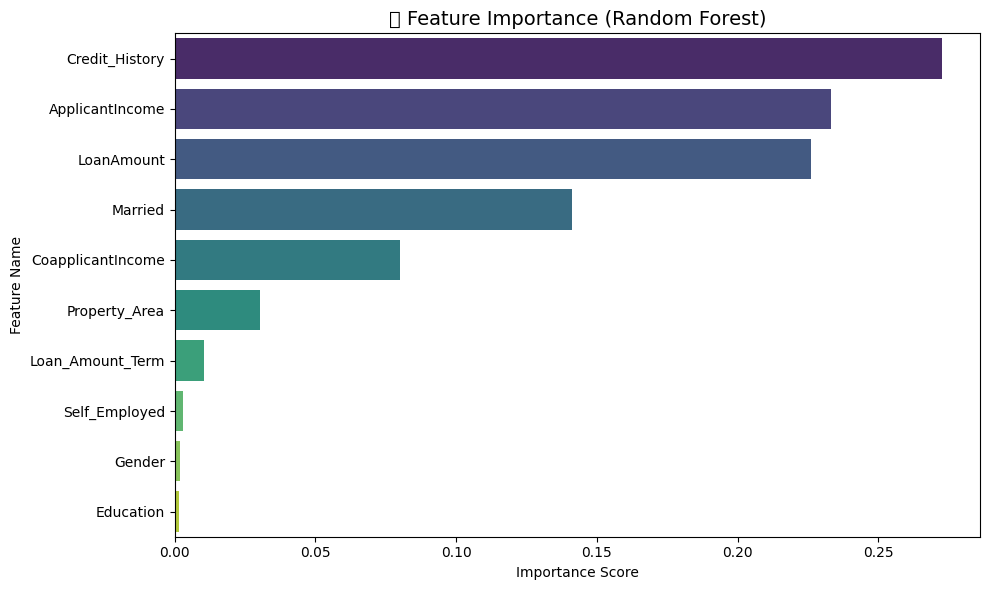

In [122]:
# Step 5: Feature Importance Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get feature importance values
feat_imp = pd.Series(model.feature_importances_, index=X.columns)

# Sort and plot
plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp.sort_values(ascending=False), y=feat_imp.sort_values(ascending=False).index, palette='viridis')

plt.title("💡 Feature Importance (Random Forest)", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.tight_layout()
plt.show()


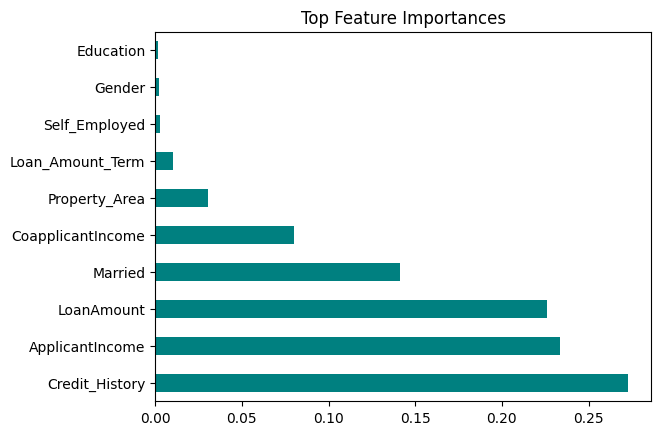

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp.nlargest(10).plot(kind='barh', color='teal')
plt.title("Top Feature Importances")
plt.show()


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             158 non-null    int32  
 1   Married            158 non-null    int32  
 2   Education          158 non-null    int32  
 3   Self_Employed      158 non-null    int32  
 4   ApplicantIncome    158 non-null    int64  
 5   CoapplicantIncome  158 non-null    int64  
 6   LoanAmount         158 non-null    int64  
 7   Loan_Amount_Term   158 non-null    int64  
 8   Credit_History     158 non-null    float64
 9   Property_Area      158 non-null    int32  
 10  Loan_Status        158 non-null    int64  
dtypes: float64(1), int32(5), int64(5)
memory usage: 10.6 KB


7️⃣ Save Cleaned Dataset

In [125]:
df.to_csv('../data/processed/cleaned_data.csv', index=False)


In [126]:
print(df.shape)
df.head()


(158, 11)


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,0,0,16402,10888,597,180,1.0,2,1
1,0,0,1,0,22371,12540,666,240,1.0,1,1
2,1,1,0,1,17038,2097,435,360,1.0,0,1
3,1,0,0,0,5572,7318,174,360,0.0,2,0
4,0,0,1,0,17068,4663,689,120,1.0,1,1
